# Ensabble Learning

## Bagging
- create a custom model based on differnet models
- use SVM, KNN, LG and NB to create a custom models

In [6]:
import warnings
warnings.filterwarnings(action="ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [8]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

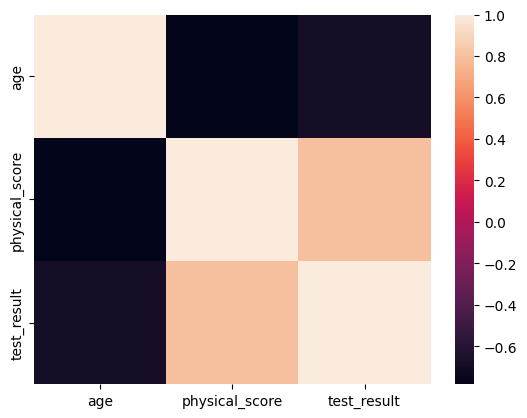

In [9]:
sns.heatmap(df.corr())

In [10]:
x = df.drop('test_result',axis = 1)
y = df['test_result']

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

## model building

### Logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegressionCV

def create_logostic_regression_model():

    model = LogisticRegressionCV(max_iter=1000)

    model.fit(x_train,y_train)

    return model
    

### KNN model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_model():

    model = KNeighborsClassifier()

    model.fit(x_train,y_train)

    return model

### SVM model

In [23]:
from sklearn.svm import SVC

def create_svm_model():

    model = SVC(C=2,kernel='rbf')

    model.fit(x_train,y_train)

    return model

### Naive Bayes model

In [24]:
from sklearn.naive_bayes import GaussianNB

def create_naive_bayes_model():

    model = GaussianNB()

    model.fit(x_train,y_train)

    return model

### decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree_model():

    model = DecisionTreeClassifier()

    model.fit(x_train,y_train)

    return model

## Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    return f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"

In [27]:
models = []

models.append({"name":"Logistic Regression model","model": create_logostic_regression_model()})
models.append({"name":"KNN","model": create_decision_tree_model()})
models.append({"name":"SVM","model": create_svm_model()})
models.append({"name":"Naive Bayes","model": create_naive_bayes_model()})
models.append({"name":"Decision tree","model": create_decision_tree_model()})

### custom ensable model

In [ ]:
class EnsambleModel:
    def create_custom_model(age,physical_score):
        self.__model = []
        self.__models.append({"name":"Logistic Regression model","model": create_logostic_regression_model()})
        models.append({"name":"KNN","model": create_decision_tree_model()})
        models.append({"name":"SVM","model": create_svm_model()})
        models.append({"name":"Naive Bayes","model": create_naive_bayes_model()})
        models.append({"name":"Decision tree","model": create_decision_tree_model()})